For analysis of the results, jumpto [here](https://colab.research.google.com/drive/1GqDjUDZ40JvFX1wrv6d99lILkp2R7RRw?authuser=1#scrollTo=xUBiqUfnCgd_&line=2&uniqifier=1)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def normaliseImgData(data):
  # From 0 - 255 range to 0 - 1
  return tf.cast(data, tf.float32)/ 255.

x_train= normaliseImgData(x_train)
x_test= normaliseImgData(x_test)

# Add the channel dimension to the input data
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [ ]:

assert x_train.shape == (60000, 28, 28,1)
assert x_test.shape == (10000, 28, 28,1)
assert y_train.shape == (60000,10)
assert y_test.shape == (10000,10)

In [ ]:
#CONSTANTS
img_SHAPE = (28,28,1)

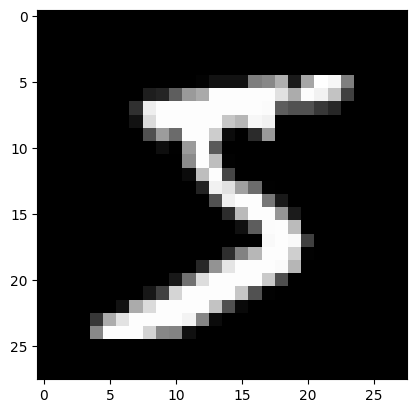

In [ ]:
def display_grayscale_img(img):
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.show()

display_grayscale_img(x_train[0])

In [ ]:
import tensorflow.keras.layers as tfls

In [ ]:
# Creating Model
img_inputs = tf.keras.Input(shape=(28,28,1,))
x = tfls.Conv2D(filters= 10,kernel_size=3)(img_inputs) # 26x26x10
x = tfls.MaxPool2D(pool_size=(2,2),strides=2)(x) #13x13x10
x = tfls.Activation('relu')(x)
x = tfls.Conv2D(filters= 10,kernel_size=(3,3,))(x) # 11x11x10
x = tfls.MaxPool2D(pool_size=(2,2),strides=2)(x) #6x6x10
x = tfls.Activation("relu")(x)
x = tfls.Flatten()(x)
x = tfls.Dense(units=128, activation='relu')(x)
outputs = tf.keras.layers.Dense(10)(x)

model = tf.keras.Model(inputs=img_inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 activation (Activation)     (None, 13, 13, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                   

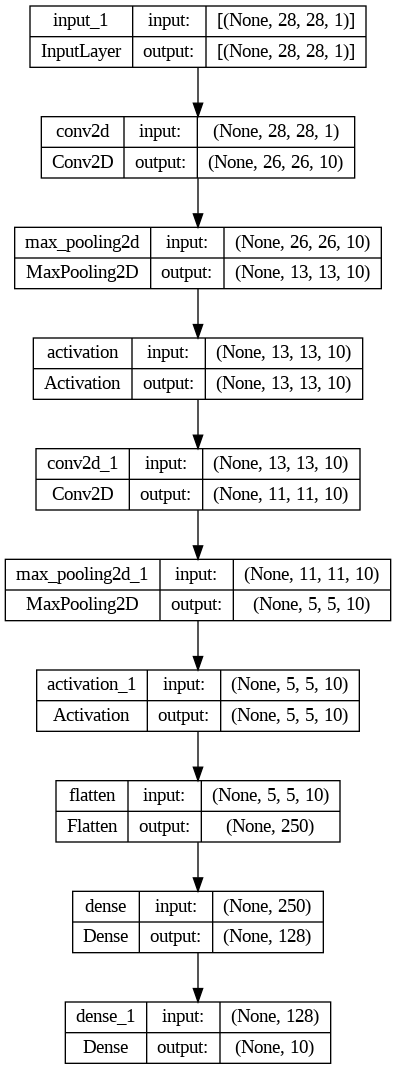

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
learningRate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learningRate),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)


In [ ]:
def plotProgress(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,1.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

Epoch 1/10
844/844 [==============================] - 15s 4ms/step - loss: 0.2783 - accuracy: 0.9163 - val_loss: 0.0850 - val_accuracy: 0.9758
Epoch 2/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0868 - accuracy: 0.9732 - val_loss: 0.0662 - val_accuracy: 0.9792
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0628 - accuracy: 0.9807 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 5/10
844/844 [==============================] - 4s 4ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0484 - val_accuracy: 0.9848
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0351 - accuracy: 0.9889 - val_loss: 0.0510 - val_accuracy: 0.9872
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0496 - val_accuracy: 0.9857
Epoch

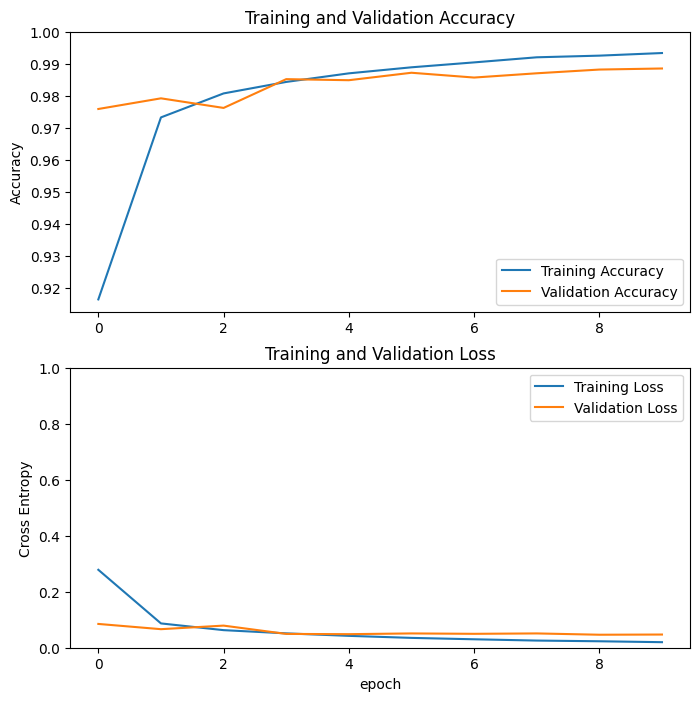

In [ ]:
checkpoint_filepath = 'model_checkpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,  # Set to True to save only the model's weights, not the whole model
    monitor='val_accuracy',  # Choose a metric to monitor (e.g., val_loss or val_accuracy)
    save_best_only=True,  # Set to True to save only the best model based on the monitored metric
    mode='max'  # Choose 'max' for accuracy, 'min' for loss, etc., depending on the monitored metric
)

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1, callbacks=[checkpoint_callback])
plotProgress(history)

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0344 - accuracy: 0.9886 - 1s/epoch - 3ms/step
Test loss: 0.03442766144871712
Test accuracy: 0.9886000156402588


In [ ]:
# The model weights (that are considered the best) are loaded into the
# model.
model.load_weights(checkpoint_filepath)

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Best Test loss:", test_scores[0])
print("Best Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0344 - accuracy: 0.9886 - 636ms/epoch - 2ms/step
Best Test loss: 0.03442766144871712
Best Test accuracy: 0.9886000156402588


In [ ]:
# model.save("MNIST_Model.keras")

In [ ]:
# model = tf.keras.models.load_model("MNIST_Model.keras")

In [ ]:
def getProbability(p_arr):
  p = np.exp(p_arr)
  p_sum = np.sum(p,axis=1,keepdims=True)
  return p/p_sum

def getMNISTlabel(p_arr):
  if p_arr.ndim == 2:
    return np.argmax(p_arr,axis=1)
  return np.argmax(p_arr)

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
# Getting Started
perturbations = create_adversarial_pattern(x_test,y_test)
perturbations.shape

TensorShape([10000, 28, 28, 1])

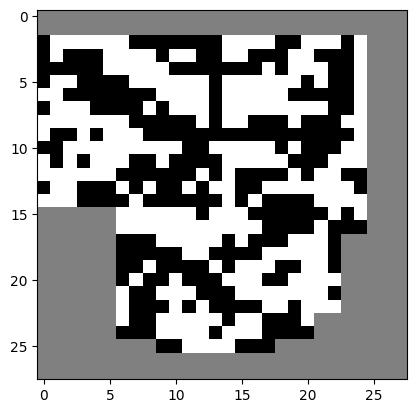

In [ ]:
# Displaying perturbation
tempP = perturbations[0]
plt.figure()
plt.imshow(tempP)

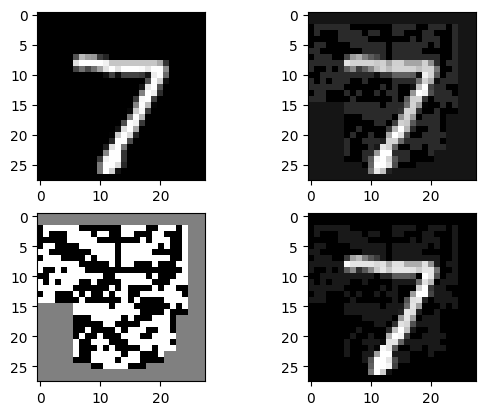

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0][0].imshow(x_test[0])
tempImg = x_test[0]+0.1*tempP
axs[0][1].imshow(tempImg)
axs[1][0].imshow(tempP)
tempImg1 = tf.clip_by_value((x_test[0]+0.1*tempP),0,1)
axs[1][1].imshow(tempImg1)

In [ ]:
# np.save("perturbations_MNIST.npy",perturbations)

In [ ]:
# perturbations = np.save("perturbations_MNIST.npy")

In [ ]:
accuracies = []
epsilon = [0,10**(-5),10**(-4),10**(-3),10**(-2),3*10**(-2),5*10**(-2),7*10**(-2),10**(-1),2*10**(-1),3*10**(-1),5*10**(-1),7*10**(-1)]

for e in epsilon:
  test_data = tf.clip_by_value(x_test+(e*perturbations),clip_value_min=0,clip_value_max=1)
  test_scores = model.evaluate(test_data, y_test, verbose=2)
  accuracies.append(test_scores[1])

313/313 - 1s - loss: 0.0344 - accuracy: 0.9886 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0344 - accuracy: 0.9885 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0346 - accuracy: 0.9885 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0361 - accuracy: 0.9878 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0534 - accuracy: 0.9823 - 1s/epoch - 4ms/step
313/313 - 2s - loss: 0.1090 - accuracy: 0.9654 - 2s/epoch - 6ms/step
313/313 - 1s - loss: 0.2042 - accuracy: 0.9400 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.3526 - accuracy: 0.8948 - 1s/epoch - 5ms/step
313/313 - 1s - loss: 0.7061 - accuracy: 0.8029 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 2.9264 - accuracy: 0.4217 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 5.3750 - accuracy: 0.1998 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 8.2730 - accuracy: 0.0699 - 1s/epoch - 5ms/step
313/313 - 2s - loss: 9.5508 - accuracy: 0.0464 - 2s/epoch - 6ms/step


Text(0.5, 1.0, 'Accuracy Drop')

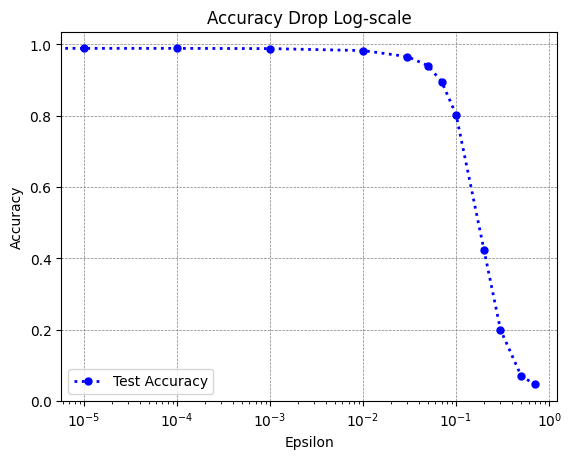

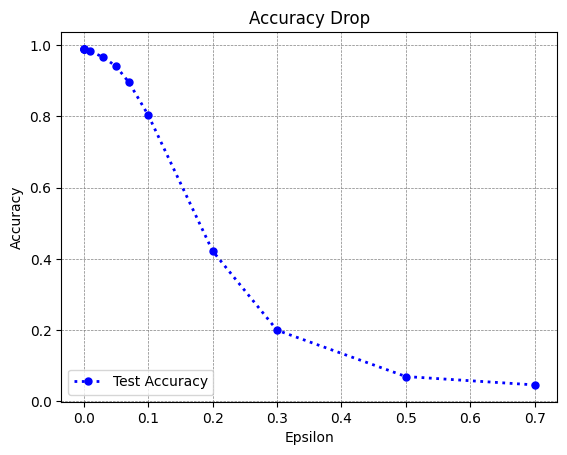

In [ ]:
plt.figure()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.plot(epsilon,accuracies,color='blue', marker='o', linestyle=':',linewidth=2, markersize=5, label='Test Accuracy')
plt.legend(loc='lower left')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.title('Accuracy Drop Log-scale')

plt.figure()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.plot(epsilon,accuracies,color='blue', marker='o', linestyle=':',linewidth=2, markersize=5, label='Test Accuracy')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Epsilon')
plt.title('Accuracy Drop')

------
Further analysis with `epsilon = 0.1`




In [ ]:
test_data = tf.clip_by_value(x_test+(0.1*perturbations),clip_value_min=0,clip_value_max=1)
test_scores = model.evaluate(test_data,y_test,verbose = 2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 2s - loss: 0.7061 - accuracy: 0.8029 - 2s/epoch - 5ms/step
Test loss: 0.7061024904251099
Test accuracy: 0.8029000163078308


In [ ]:
predictions = model.predict(test_data)
true_pred = model.predict(x_test)

313/313 [==============================] - 1s 5ms/step


In [ ]:
pred_labels = getMNISTlabel(predictions)
t_pred_labels = getMNISTlabel(true_pred)

In [ ]:
pred_labels = tf.keras.utils.to_categorical(pred_labels, num_classes=10)
t_pred_labels = tf.keras.utils.to_categorical(t_pred_labels, num_classes=10)

In [ ]:
assert pred_labels.shape == y_test.shape
print( f"Output shape: {pred_labels.shape}")
pred_match = (pred_labels == t_pred_labels)
print( f"Match shape: {pred_match.shape}")
np.sum(pred_match)

Output shape: (10000, 10)
Match shape: (10000, 10)


96276

Some images which are differently than the their clean versions

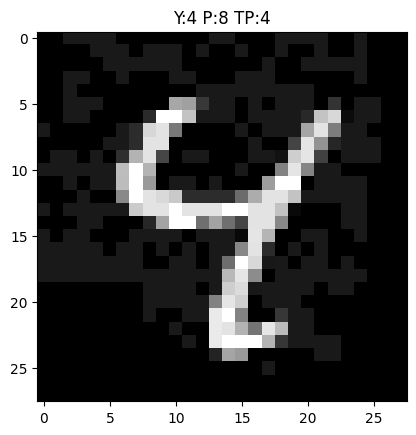

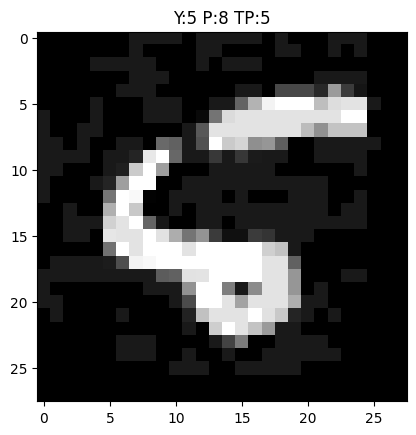

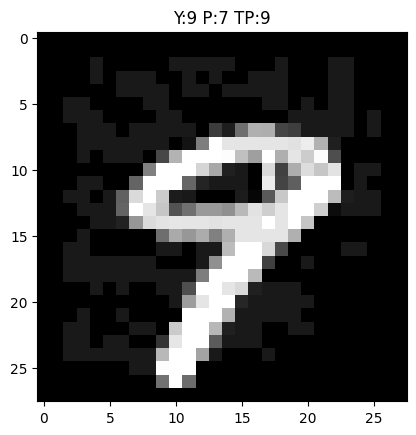

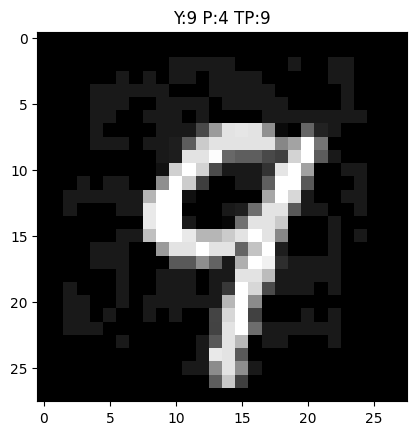

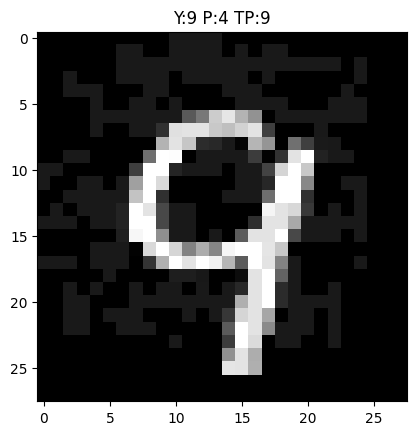

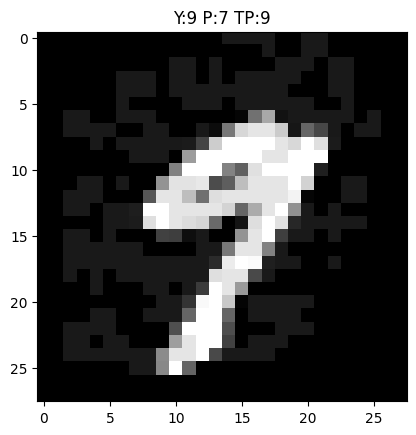

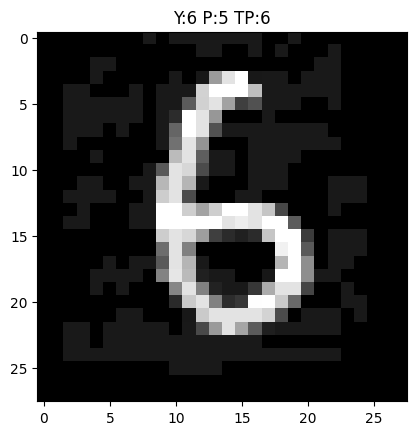

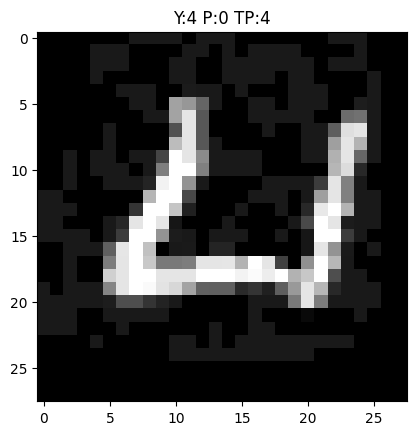

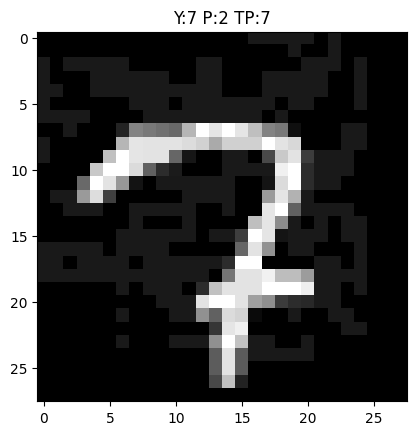

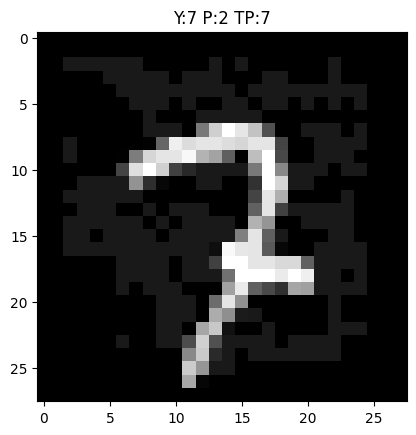

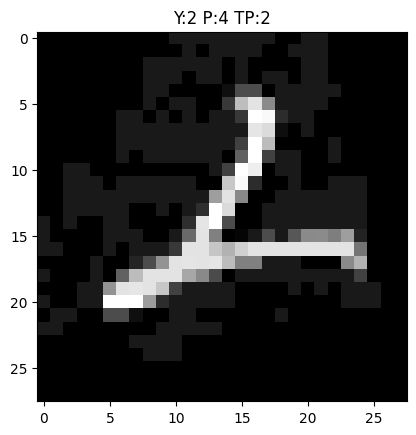

In [ ]:
misCount = 0
for index, correct in enumerate(pred_match):
  if not correct.all():
    plt.figure()
    misCount +=1
    plt.imshow(test_data[index])
    plt.title(f"Y:{getMNISTlabel(y_test[index])} P:{getMNISTlabel(pred_labels[index])} TP:{getMNISTlabel(t_pred_labels[index])}")
    plt.show()
  if misCount>10:
    break


Further numerical analysis!


In [ ]:
cc = mms = mmd = cm = mc = 0
ccl = []
mmsl = []
mmdl = []
cml = []
mcl = []
1

y = getMNISTlabel(y_test)
tp = getMNISTlabel(t_pred_labels)
p = getMNISTlabel(pred_labels)
for index in range(10000):
  if tp[index] == y[index]:
    # True predictions are right
    if p[index] == y[index]:
      cc+=1
      ccl.append(index)
    else:
      cm +=1
      cml.append(index)
  else:
    # True predictions are wrong
    if p[index] != y[index]:
      if p[index] == tp[index]:
        mms+=1
        mmsl.append(index)
      else:
        mmd+=1
        mmdl.append(index)
    else:
      mc +=1
      mcl.append(index)

In [ ]:
print(f"cc:{cc} \nmms:{mms}\nmmd:{mmd} \ncm:{cm} \nmc:{mc}")

cc:8029 
mms:109
mmd:5 
cm:1857 
mc:0


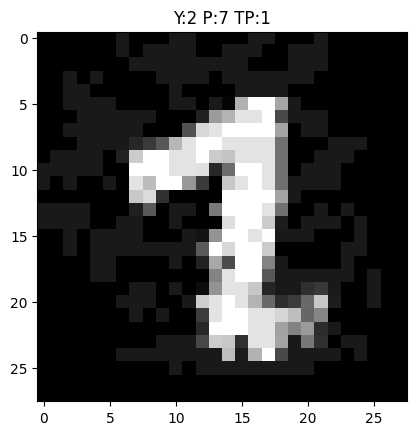

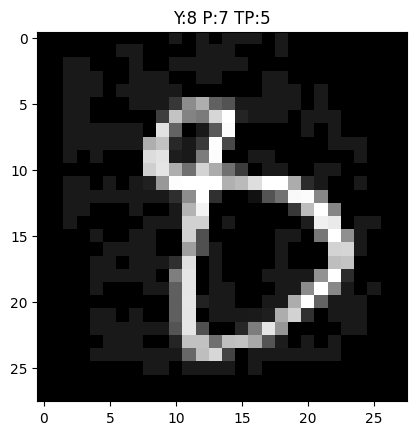

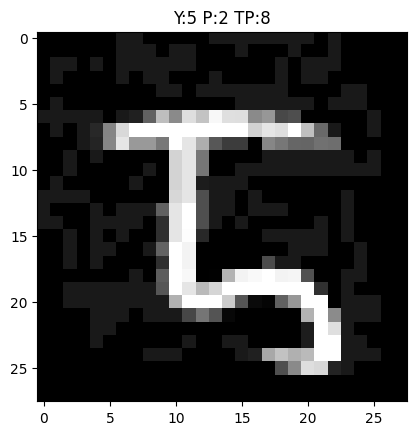

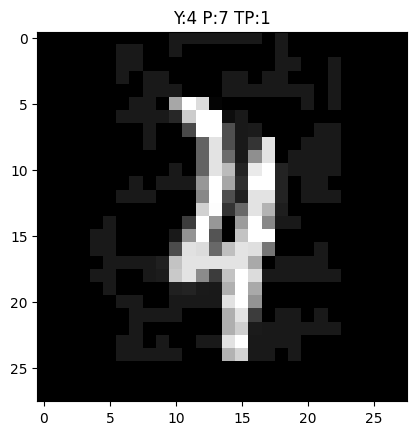

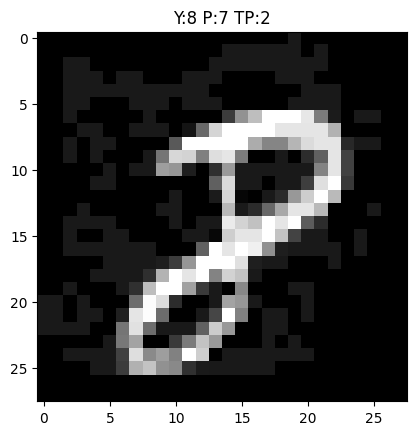

In [ ]:
for index in mmdl:
  plt.figure()
  plt.imshow(test_data[index])
  plt.title(f"Y:{getMNISTlabel(y_test[index])} P:{getMNISTlabel(pred_labels[index])} TP:{getMNISTlabel(t_pred_labels[index])}")
  plt.show()

Now analysis of misclassified examples who's clean version was correctly classified.

In [ ]:
y_cm = y[cml]
p_cm = p[cml]


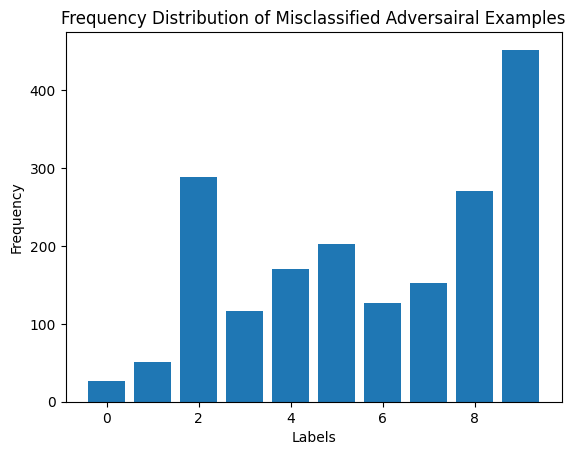

In [ ]:
unique_values, counts = np.unique(y_cm, return_counts=True)
plt.bar(unique_values, counts)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Misclassified Adversairal Examples')
plt.show()